# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** any code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [3]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the size and shape features of different varieties of dry beans [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.muratkoklu.com/datasets/) [2]), shared in the public domain by the author).

Each sample describes the measurements of a bean of a single variety, and consists of following 16 features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Area`       | `float` | Area of the bean in pixels. |
| `Perimeter` | `float` | Bean circumference is defined as the length of its border. |
| `MajorAxisLength` | `float` | The distance between the ends of the longest line that can be drawn from a bean. |
| `MinorAxisLength` | `float` | The longest line that can be drawn from the bean while standing perpendicular to the main axis. |
| `AspectRatio` | `float` | The ratio between the major and minor axis length. |
| `Eccentricity` | `float` | Eccentricity of the ellipse having the same moments as the region. |
| `ConvexArea` | `int` | Number of pixels in the smallest convex polygon that can contain the area of a bean seed. |
| `EquivDiameter` | `float` | The diameter of a circle having the same area as a bean seed area. |
| `Extent` | `float` | The ratio of the pixels in the bounding box to the bean area. |
| `Solidity` | `float` | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. |
| `Roundness`| `float` | Measures the roundness of an object. |
| `Compactness` | `float` | An alternative measure of object roundness. |
| `ShapeFactor1` | `float` | Shape features according to [4] |
| `ShapeFactor2` | `float` | Shape features according to [4] |
| `ShapeFactor3` | `float` | Shape features according to [4] |
| `ShapeFactor4` | `float` | Shape features according to [4] |



The goal for the assessment is to predict the variety of bean, listed in the last column, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Class`  | `string`: class designation | The variety of dry bean. |


## Loading the dataset

The dataset is given in _beans.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Class'` field of the _.csv_ file.
- _Note_: The class in the `'Class'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

Dataset shape: (2900, 17) (Rows: 2900, Columns: 17)
Class distribution before removing outliers:
Class
6    1000
3     550
5     400
0     300
2     300
4     250
1     100
Name: count, dtype: int64
Unique class labels before removing outliers:
[4 1 0 6 2 5 3]
Missing values in each column after dropping nulls:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Summary statistics for numeric columns:
                Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count    2866.000000  2866.000000      2866.000000      2866.000000   
mean    50420.050244   830.342807       309.683159       198.410370   
std     28422.267844   209.720929        83.217528        44.015

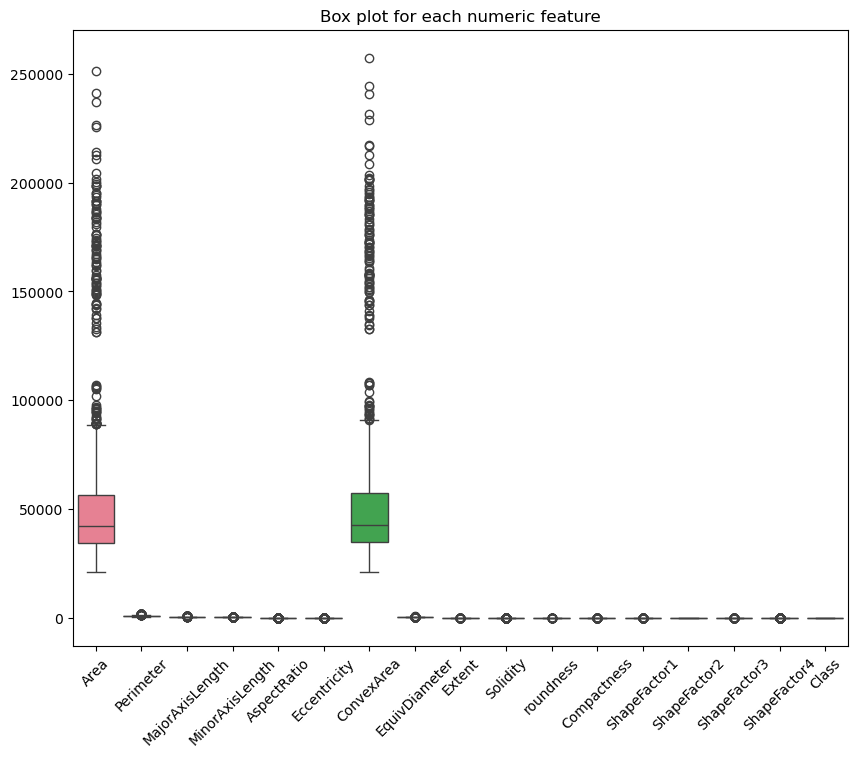

Dataset shape after removing outliers: (2754, 17) (Rows: 2754, Columns: 17)
Class distribution after removing outliers:
Class
6    977
3    550
5    392
0    295
2    282
4    246
1     12
Name: count, dtype: int64
Remaining outliers per feature:
Area: 73 remaining outliers
Perimeter: 0 remaining outliers
MajorAxisLength: 0 remaining outliers
MinorAxisLength: 3 remaining outliers
AspectRatio: 0 remaining outliers
Eccentricity: 2 remaining outliers
ConvexArea: 11 remaining outliers
EquivDiameter: 0 remaining outliers
Extent: 0 remaining outliers
Solidity: 14 remaining outliers
roundness: 0 remaining outliers
Compactness: 0 remaining outliers
ShapeFactor1: 0 remaining outliers
ShapeFactor2: 0 remaining outliers
ShapeFactor3: 0 remaining outliers
ShapeFactor4: 9 remaining outliers
Class: 0 remaining outliers
Total remaining outliers in the dataset: 112
Number of samples: 2754
Number of features: 16
Number of unique classes: 7


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
data = pd.read_csv('beans.csv')

#Shape of the dataset
print(f"Dataset shape: {data.shape} (Rows: {data.shape[0]}, Columns: {data.shape[1]})")

#Encoding the Class to convert numerical
columns = list(set(data['Class']))
mapping = {columns[i]: i for i in range(len(columns))}

data['Class'] = data['Class'].map(mapping)

#Check class distribution before removing outliers
print("Class distribution before removing outliers:")
print(data['Class'].value_counts())

#Check for any class mislabels or inconsistencies
print("Unique class labels before removing outliers:")
print(data['Class'].unique())

#Drop rows with missing values (nulls)
data.dropna(inplace=True)

#Check for any potential missing values after dropping rows
print("Missing values in each column after dropping nulls:")
print(data.isnull().sum())

#Identifying the numeric columns for handling outliers
numeric_cols = data.select_dtypes(include=['number']).columns

#Summary of the statistics for numeric features
print("Summary statistics for numeric columns:")
print(data.describe())

#Box plots to visualise potential outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[numeric_cols])
plt.title('Box plot for each numeric feature')
plt.xticks(rotation=45)
plt.show()

#Handle outliers using IQR method with a multiplier of 4.5
outliers_remaining = {}
total_remaining_outliers = 0

for col in numeric_cols:
    #Calculate IQR for the column
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 4.5 * IQR  # Using 2.5 instead of 1.5 for more lenient detection
    upper_bound = Q3 + 4.5 * IQR  # Using 2.5 instead of 1.5 for more lenient detection
    
    #Identify remaining outliers after filtering
    remaining_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_remaining[col] = remaining_outliers.shape[0]
    total_remaining_outliers += remaining_outliers.shape[0]
    
    #Remove outliers by filtering the dataset
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#After handling outliers, check the new shape of the data
print(f"Dataset shape after removing outliers: {data.shape} (Rows: {data.shape[0]}, Columns: {data.shape[1]})")

#Check class distribution after removing outliers
print("Class distribution after removing outliers:")
print(data['Class'].value_counts())

#Print out the number of remaining outliers per feature
print("Remaining outliers per feature:")
for col, count in outliers_remaining.items():
    print(f"{col}: {count} remaining outliers")

#Print total remaining outliers
print(f"Total remaining outliers in the dataset: {total_remaining_outliers}")

#Separate features (X) and target (y)
y = data['Class']  # Target variable
X = data.drop(columns=['Class'])  # Features

#Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

#Print the amount for each section
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Number of unique classes:", len(np.unique(y)))


In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,68035,1022.207,355.899595,244.028109,1.458437,0.727917,69243,294.321002,0.797017,0.982554,0.818210,0.826978,0.005231,0.001509,0.683892,0.997413,4
1,66871,990.128,372.968458,229.417890,1.625717,0.788439,67765,291.792395,0.801868,0.986807,0.857166,0.782351,0.005577,0.001289,0.612074,0.995058,4
2,89235,1197.862,395.687961,288.807741,1.370074,0.683567,90764,337.071996,0.769082,0.983154,0.781505,0.851863,0.004434,0.001440,0.725671,0.994223,4
3,60408,999.737,369.487535,208.936425,1.768421,0.824765,61404,277.333472,0.742478,0.983780,0.759509,0.750590,0.006117,0.001198,0.563385,0.996301,4
4,70344,1037.985,378.651095,237.909773,1.591574,0.777964,71521,299.273725,0.821354,0.983543,0.820455,0.790368,0.005383,0.001296,0.624682,0.994227,4


**TESTING CELL**

In [4]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

 The dataset is checked using EDA techniques, initially I checked for any outliers and if there were any label inconsistencies , I printed out the results for debugging purposes. I then dropped any fields with missing values (nulls) so that the data isn't skewed by empty datasets. Debugging code is then used to check for any nulls that were not removed. I also included a summary of the statistics for numeric values to provide better understanding of the data. Using the IQR method I dealt with any outliers that could potentially skew the dataset as by removing them it helps to make sure the model learns the relevant patterns for the dataset. 
 
 The use of IQR method is effective for the most part as it is a robust method that relies on the middle 50% of the data so it ignores extreme outliers, I used 4.5 instead of 1.5 as having a higher multiplier gives a more lenient detection criteria which is useful for the large dataset at hand. I checked the shape of the data and how the class distribution is affected after cleaning the data. Finally, I printed out remaining outliers after implementing EDA to make sure none were left.
 
 There are 2900 samples and 16 features in the beans.csv dataset. These features in the dataset consist of both integer and float values, which are suitable for numerical processing without additional encoding.  Floats are good for providing detailed geometrical properties of the samples which is useful for distinguishing between classes, there were 7 unique classes. There were 38 missing values in the dataset, which I handled by filling the missing values in numerical columns with their respective mean values.

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_pred`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

#Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Show the shape of the resulting train-test split to verify
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 2203, Test set size: 551


**TESTING CELL**

In [6]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

Accuracy: 0.896551724137931


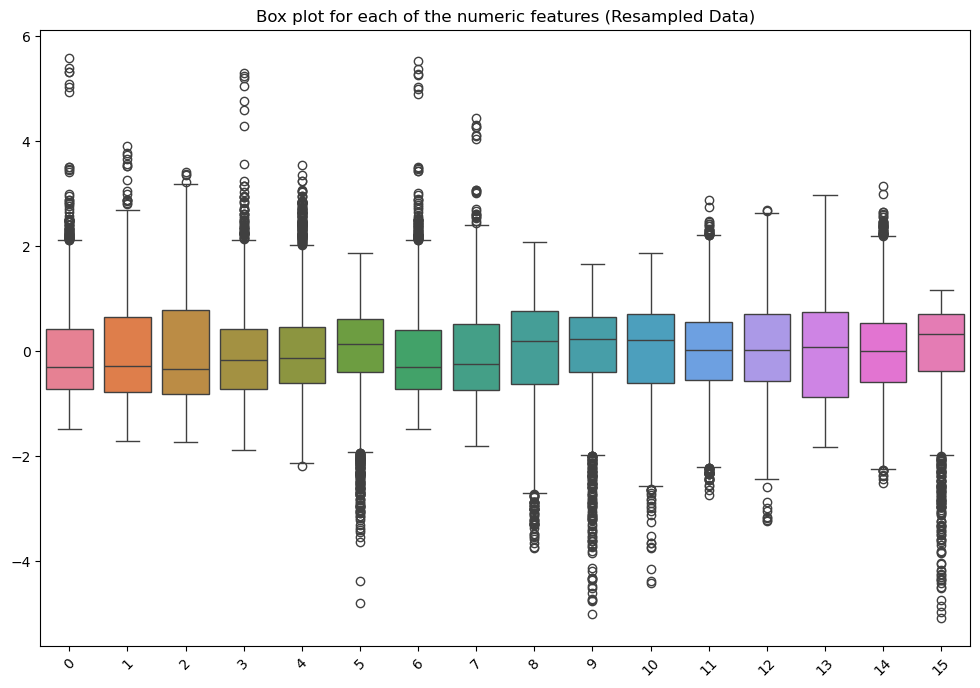

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Function to calculate accuracy
def model_accuracy(y_test, y_pred):
    ################################
    #### ADD YOUR SOLUTION HERE ####
    ################################
    return accuracy_score(y_test, y_pred)


#Initialise the KNN model
model = KNeighborsClassifier(n_neighbors=3)

#Train the model on the resampled training data
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model's accuracy using the function
accuracy = model_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Box plots to visualise the dataset after resampling
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_train))  # Use the resampled training data
plt.title('Box plot for each of the numeric features (Resampled Data)')
plt.xticks(rotation=45)
plt.show()

**TESTING CELL**

In [8]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_pred))

[3]
0.896551724137931


**ANSWER CELL**

The shortcomings of the evaluation strategy is that it is not the best option for an imbalanced dataset such as the one provided. Using accuracy as a way to evaluate the model means that because the model is imbalanced the smaller class will be not considered and therefore the model will almost always believe the larger class would have better accuracy as it would completely fail to consider the smaller classes. This can cause the model to hide that it is doing poorly on the smaller class which can be the more important class depending on what the company wants from the sample. Accuracy doesn't provide much detail so while it can say that it is doing well overall it doesn't tell us how it performs in each class therefore it can in actuality be under performing in the key aspects of the model. Accuracy is more useful on datasets that are already balanced so it doesn't encounter these sorts of problems and thrives being used in these instances as it has general usability and is quite simple to implement and understand overall. 

It is also an effective measure for binary classification in the instance of a balanced dataset and is generally widely used and accepted. But in this specific install it falls short from being the most optimal metric for measuring the accuracy of the evaluation and model. Using F1-Score instead which is more often used in the instance of imbalance datasets would be more effective. Furthermore, the use of a simple train-test split whilst being easy to understand and use only evaluates the model once which can cause unreliable results if the split isn't representing the entire dataset. It would also benefit from a confusion matrix to be able to tell which classes the model is able to predict accuracy and which it gets confused on.

The model has an accuracy of 0.8989547038327527 (89.9%) which in a balanced dataset this could be taken at face value which would mean this would be a good result however, as previously mentioned because accuracy doesn't work as efficiently on imbalanced datasets this result might be masking a poor performance on the minority class which would be equally as important.

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- **Implement a function** `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision) calculated for every class. You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [9]:
from sklearn.metrics import f1_score, classification_report

def evaluate_model(model, X, y):
    print('Evaluating model...')
    ################################
    #### ADD YOUR SOLUTION HERE ####
    ################################
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scale the cleaned features

    #Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #Train the model on the resampled training data
    model.fit(X_train, y_train)

    #Make predictions on the test data
    y_pred = model.predict(X_test)

    #Evaluate the model's accuracy using the function
    accuracy = model_accuracy(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    #F1 score to replace accuracy
    f1_average = f1_score(y_pred,y_test, average='weighted')
    f1 = f1_score(y_test, y_pred, average=None) 
    print(f"F1 Score: {f1_average: .4f}")
    print('Per Class')
    for i in range(len(columns)):
        print(f"Class: {i}, F1 = {f1[i]}")
    
    print(classification_report(y_test, y_pred))
    
    #Box plots to visualise the dataset after resampling
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=pd.DataFrame(X_train))  # Use the resampled training data
    plt.title('Box plot for each of the numeric features (Resampled Data)')
    plt.xticks(rotation=45)
    plt.show()

**TESTING CELL**

Evaluating model...
Accuracy: 0.896551724137931
F1 Score:  0.8962
Per Class
Class: 0, F1 = 0.916030534351145
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9583333333333334
Class: 3, F1 = 0.8455284552845529
Class: 4, F1 = 0.8333333333333334
Class: 5, F1 = 0.9032258064516129
Class: 6, F1 = 0.9184782608695652
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       1.00      1.00      1.00         5
           2       0.96      0.96      0.96        48
           3       0.82      0.87      0.85       119
           4       0.85      0.82      0.83        49
           5       0.92      0.89      0.90        79
           6       0.92      0.91      0.92       185

    accuracy                           0.90       551
   macro avg       0.91      0.91      0.91       551
weighted avg       0.90      0.90      0.90       551



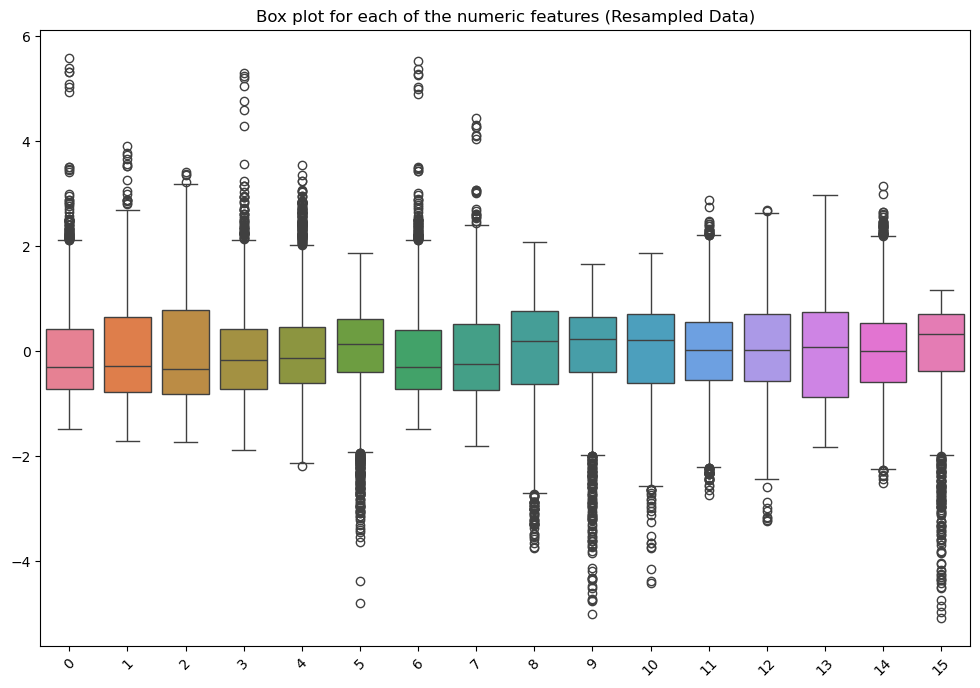

In [10]:
evaluate_model(model, X, y)

**ANSWER CELL**

To improve the evaluation strategy F1 score was chosen to be included in the process. This is because the dataset is imbalanced and thus this proved to be the most efficient strategy to be able to get an accurate score, along with making sure that by using it for each class the accuracy method didn't just completely neglect the smaller datasets to create an inaccurate accuracy in the results. F1 score balances precision and recall which is the best solution for the imbalances in this dataset, however, accuracy was still included as a summative metric as it a good sense of overall performance albeit not as accurate due to the imbalance. Using F1 score and classification report to show the precision, recall and F1 scores per class gives insights into how the model is doing with each class individually identifying under performing classes which using simply accuracy would lack.

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC


################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] #####

#Scale the features using StandardScaler method
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

#Using gridsearchCV to define the parameters for the grid per model
param_grid_model1 = {
    'kernel':['linear','rbf'],
    'C': [0.1,1,10]
    }

param_grid_model2 = {
    'C': [0.1,1,10],
    'solver': ['saga'],
    'max_iter': [10000,20000],
    }


param_grid_model3 = {
    'solver': ['sgd'],
    'hidden_layer_sizes': [(50,),(100,),(200,)],
    'max_iter': [10000,20000],
}

#Create GridSearchCV for each of the three models
grid_model1 = GridSearchCV(SVC(), param_grid_model1, scoring='f1_weighted', cv=5)
grid_model2 =GridSearchCV(LogisticRegression(), param_grid_model2, scoring='f1_weighted', cv=5)
grid_model3 = GridSearchCV(MLPClassifier(), param_grid_model3, scoring='f1_weighted', cv=5)

#Fit the models with GridSearch
grid_model1.fit(X_train,y_train)
grid_model2.fit(X_train,y_train)
grid_model3.fit(X_train,y_train)

################################

model_1 = grid_model1.best_estimator_
model_2 = grid_model2.best_estimator_
model_3 = grid_model3.best_estimator_

print(f"Evaluation Model 1: SVM")
print(f"Evaluation Model 2: Logistic Regression")
print(f"Evaluation Model 3: NN model")

Evaluation Model 1: SVM
Evaluation Model 2: Logistic Regression
Evaluation Model 3: NN model


**TESTING CELL**

Evaluating model...
Accuracy: 0.9128856624319419
F1 Score:  0.9127
Per Class
Class: 0, F1 = 0.9465648854961832
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9375
Class: 3, F1 = 0.8713692946058091
Class: 4, F1 = 0.8979591836734694
Class: 5, F1 = 0.9182389937106918
Class: 6, F1 = 0.9209809264305178
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       1.00      1.00      1.00         5
           2       0.94      0.94      0.94        48
           3       0.86      0.88      0.87       119
           4       0.90      0.90      0.90        49
           5       0.91      0.92      0.92        79
           6       0.93      0.91      0.92       185

    accuracy                           0.91       551
   macro avg       0.93      0.93      0.93       551
weighted avg       0.91      0.91      0.91       551



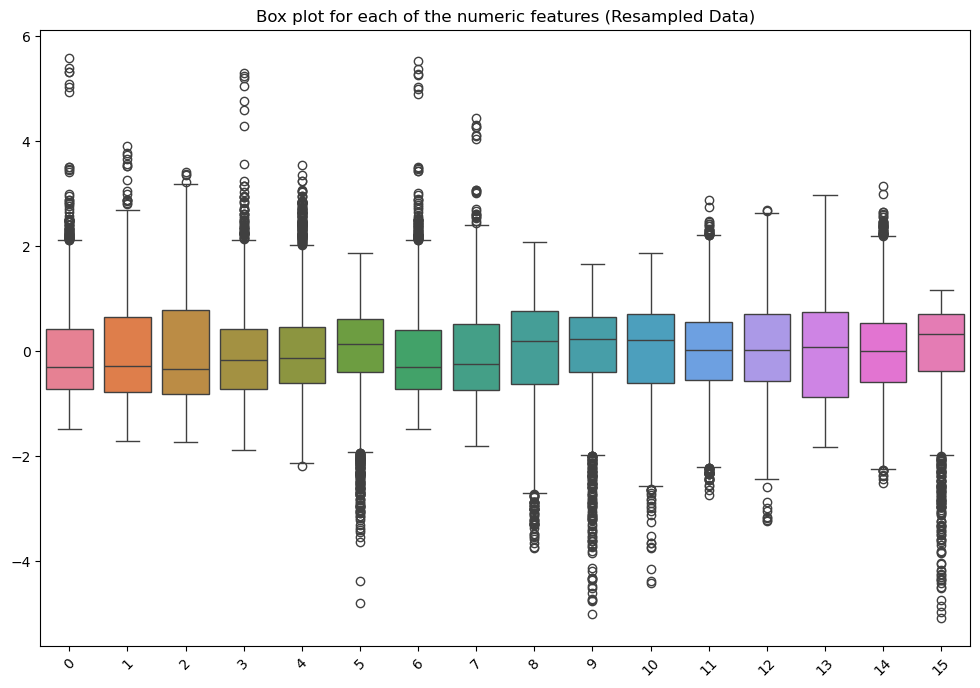


Evaluating model...
Accuracy: 0.9147005444646098
F1 Score:  0.9147
Per Class
Class: 0, F1 = 0.9393939393939394
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9387755102040817
Class: 3, F1 = 0.8833333333333333
Class: 4, F1 = 0.8865979381443299
Class: 5, F1 = 0.925
Class: 6, F1 = 0.9205479452054794
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       1.00      1.00      1.00         5
           2       0.92      0.96      0.94        48
           3       0.88      0.89      0.88       119
           4       0.90      0.88      0.89        49
           5       0.91      0.94      0.93        79
           6       0.93      0.91      0.92       185

    accuracy                           0.91       551
   macro avg       0.93      0.93      0.93       551
weighted avg       0.91      0.91      0.91       551



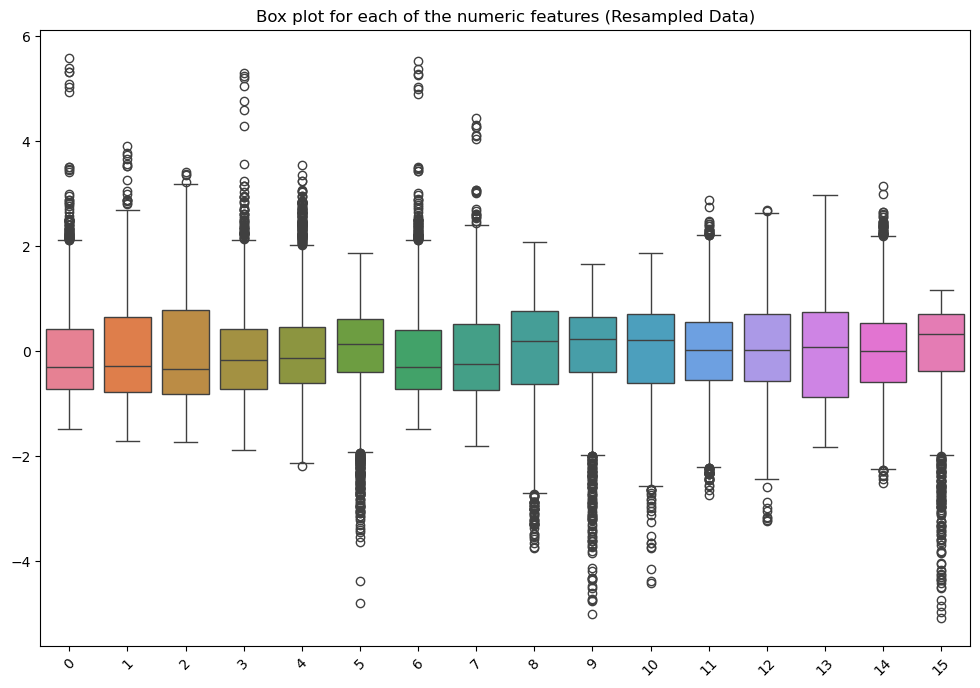


Evaluating model...
Accuracy: 0.9165154264972777
F1 Score:  0.9165
Per Class
Class: 0, F1 = 0.9393939393939394
Class: 1, F1 = 0.8888888888888888
Class: 2, F1 = 0.9484536082474226
Class: 3, F1 = 0.8833333333333333
Class: 4, F1 = 0.8775510204081632
Class: 5, F1 = 0.925
Class: 6, F1 = 0.9289617486338798
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       1.00      0.80      0.89         5
           2       0.94      0.96      0.95        48
           3       0.88      0.89      0.88       119
           4       0.88      0.88      0.88        49
           5       0.91      0.94      0.93        79
           6       0.94      0.92      0.93       185

    accuracy                           0.92       551
   macro avg       0.93      0.90      0.91       551
weighted avg       0.92      0.92      0.92       551



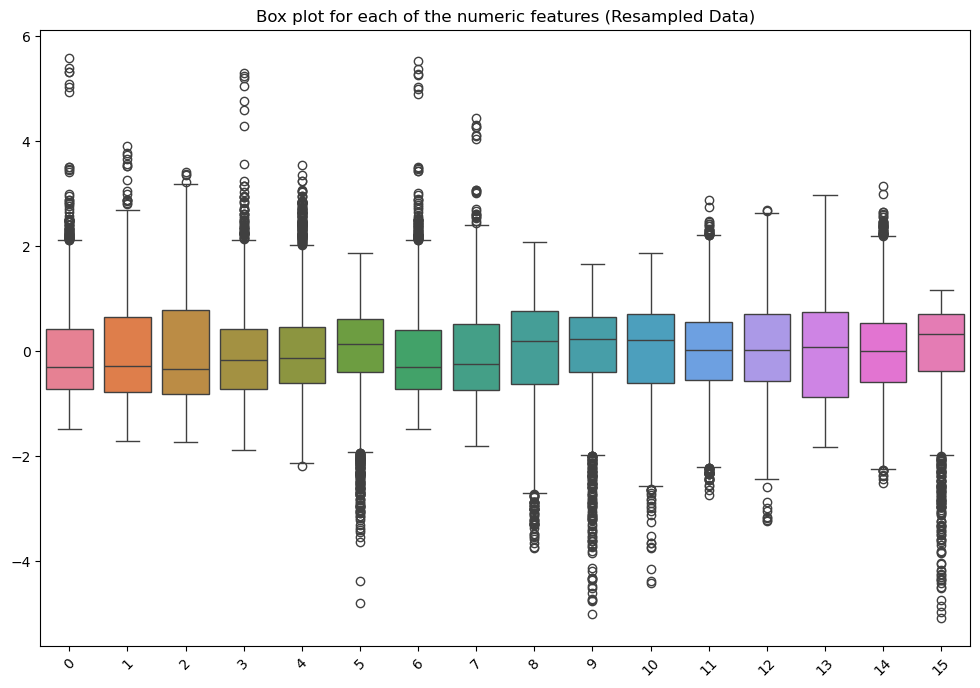

In [20]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

**ANSWER CELL**

Firstly, for this task, the three models I chose were SVM, Logistic Regression, and Neural Network models based on their ability to handle a large dataset and capture different types of patterns in the data. SVM has a high precision accuracy, and whilst usually used for smaller datasets by using linear kernels for speed, it is able to fit a big dataset like this one as well. It performs well even when the dataset is not perfectly linearly separable, proven by the SVM F1 score result being the best model result out of the three, this is probably due to the SVMs robustness to over-fitting which is one of the reasons it outperformed the other models. Its flexibility to use different kernel functions, such as linear and RBF kernels, makes it possible for it to adapt to various data distributions. 

Secondly, Logistic Regression was chosen as the second model as it scales well for large datasets such as the beans dataset, and by using the Saga solver ensures that it can handle large numbers of samples efficiently. It is a simple model that is ideal for quick results. However, one of its downsides is that there is a risk of the model over-fitting using it on high-dimensional datasets such as this one. It also has a decrease in performance as the amount of data increases which is why it only places second for F1 score out of the three models. 

Thirdly, The Neural Network model is the third and final model selected, it scored the lowest out of the three. This is probably because whilst Neural Network models tend to perform better with large amounts of data because they are able to model complicated patterns, due to the beans dataset having some classes that can be underrepresented, it has a risk of over-fitting. They also have a lot of hyper-parameters that need to be tuned carefully; therefore, there is a higher chance of under-performing. 

Secondly, I chose F1 score to decide which of the models was the best due to the fact that the dataset is large and has imbalances which the F1 score function is best to be used for as it uses precision and recall to balance imbalanced datasets. It also into account false positives and false negatives, which makes it more informative than simply using just accuracy. Furthermore, to optimise the performance of each model, I tuned the parameters; C and Kernel for SVM model, Solver and max_iter for  Logistic Regression model and hidden_layers_sizes,max_iter and solver for Neural Network model by importing GridSearchCV, a robust method to systematically find the best parameters for each of the models. This method helped to automate the process of hyperparameter tuning. However, GridSearchCV is quite slow, especially when dealing with large datasets so it would be probably better to look into alternative ways of tuning the models parameters such as random search or bayesian search.

references:
1. Verma, A. (2023). GridSearchCV in scikit-learn: A Comprehensive Guide. [online] DEV Community. Available at: https://dev.to/anurag629/gridsearchcv-in-scikit-learn-a-comprehensive-guide-2a72.

2. Scikit-Learn (2024). LogisticRegression. [online] scikit-learn. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html.

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [22]:
from sklearn.ensemble import BaggingClassifier
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] ####

bagged_1 = BaggingClassifier(estimator=model_1,n_estimators=50,random_state=42)
bagged_2 = BaggingClassifier(estimator=model_2,n_estimators=50,random_state=42)
bagged_3 = BaggingClassifier(estimator=model_3,n_estimators=50,random_state=42)


**TESTING CELL**

Evaluating model...
Accuracy: 0.911070780399274
F1 Score:  0.9109
Per Class
Class: 0, F1 = 0.9465648854961832
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9387755102040817
Class: 3, F1 = 0.8677685950413223
Class: 4, F1 = 0.8979591836734694
Class: 5, F1 = 0.925
Class: 6, F1 = 0.9146005509641874
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       1.00      1.00      1.00         5
           2       0.92      0.96      0.94        48
           3       0.85      0.88      0.87       119
           4       0.90      0.90      0.90        49
           5       0.91      0.94      0.93        79
           6       0.93      0.90      0.91       185

    accuracy                           0.91       551
   macro avg       0.92      0.93      0.93       551
weighted avg       0.91      0.91      0.91       551



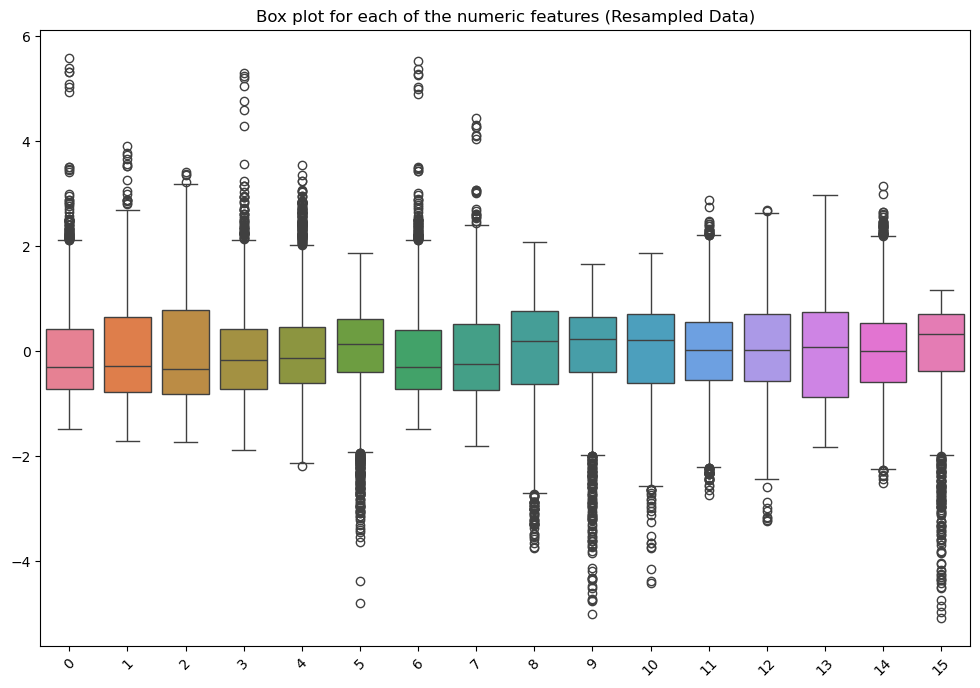


Evaluating model...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Accuracy: 0.9128856624319419
F1 Score:  0.9129
Per Class
Class: 0, F1 = 0.9393939393939394
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9387755102040817
Class: 3, F1 = 0.8796680497925311
Class: 4, F1 = 0.8865979381443299
Class: 5, F1 = 0.9316770186335404
Class: 6, F1 = 0.9146005509641874
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       1.00      1.00      1.00         5
           2       0.92      0.96      0.94        48
           3       0.87      0.89      0.88       119
           4       0.90      0.88      0.89        49
           5       0.91      0.95      0.93        79
           6       0.93      0.90      0.91       185

    accuracy                           0.91       551
   macro avg       0.92      0.93      0.93       551
weighted avg       0.91      0.91      0.91       551



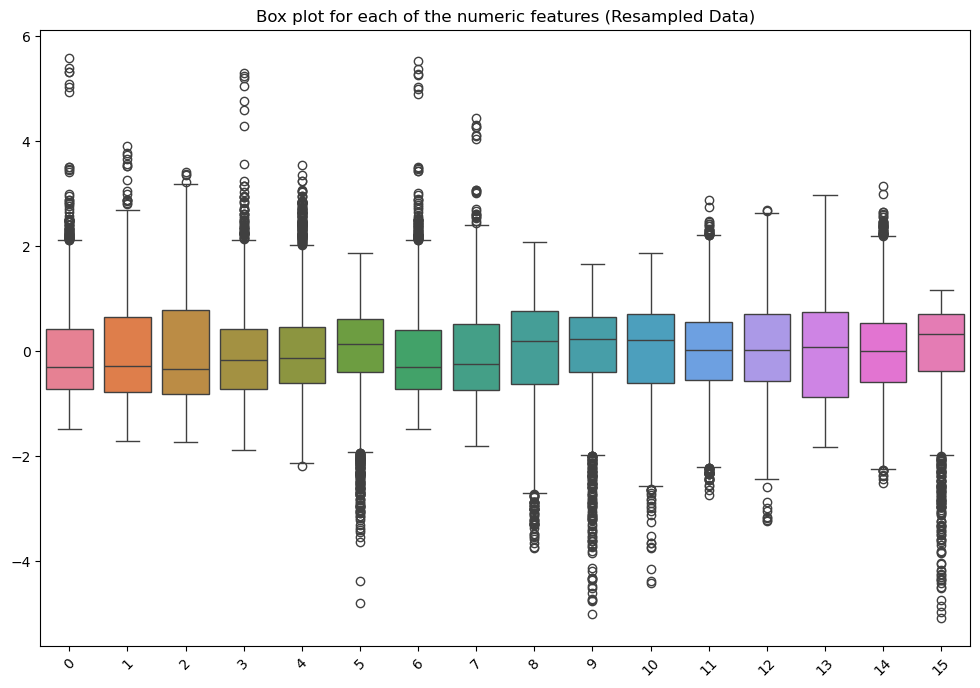


Evaluating model...
Accuracy: 0.911070780399274
F1 Score:  0.9111
Per Class
Class: 0, F1 = 0.9323308270676691
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9387755102040817
Class: 3, F1 = 0.875
Class: 4, F1 = 0.875
Class: 5, F1 = 0.9182389937106918
Class: 6, F1 = 0.9234972677595629
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        66
           1       1.00      1.00      1.00         5
           2       0.92      0.96      0.94        48
           3       0.87      0.88      0.88       119
           4       0.89      0.86      0.88        49
           5       0.91      0.92      0.92        79
           6       0.93      0.91      0.92       185

    accuracy                           0.91       551
   macro avg       0.92      0.92      0.92       551
weighted avg       0.91      0.91      0.91       551



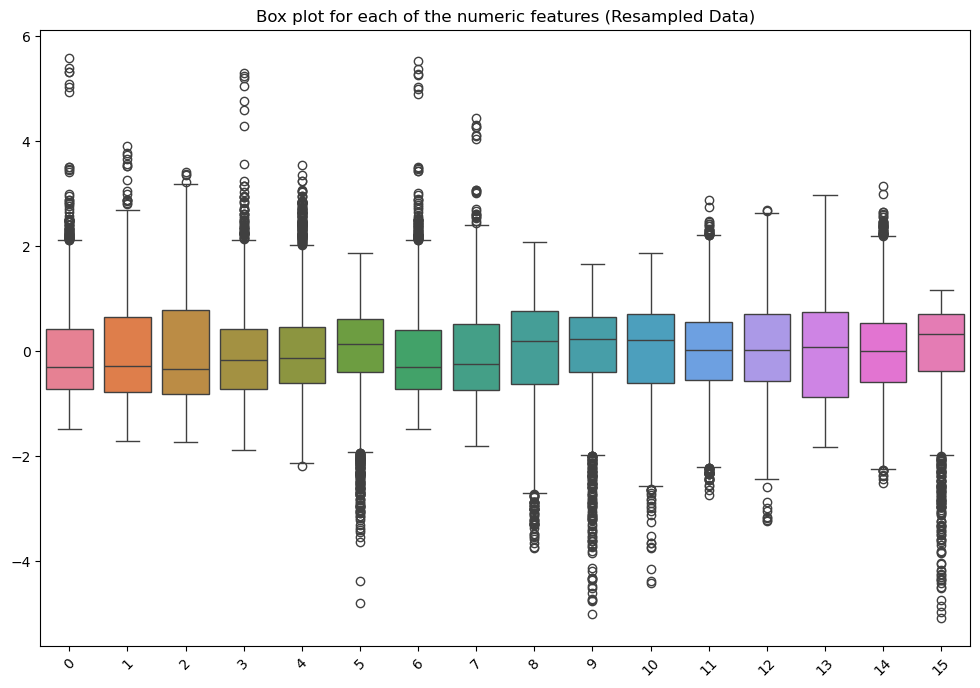


Evaluating model...
Accuracy: 0.911070780399274
F1 Score:  0.9110
Per Class
Class: 0, F1 = 0.9393939393939394
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9278350515463918
Class: 3, F1 = 0.875
Class: 4, F1 = 0.8865979381443299
Class: 5, F1 = 0.925
Class: 6, F1 = 0.9180327868852459
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       1.00      1.00      1.00         5
           2       0.92      0.94      0.93        48
           3       0.87      0.88      0.88       119
           4       0.90      0.88      0.89        49
           5       0.91      0.94      0.93        79
           6       0.93      0.91      0.92       185

    accuracy                           0.91       551
   macro avg       0.92      0.93      0.92       551
weighted avg       0.91      0.91      0.91       551



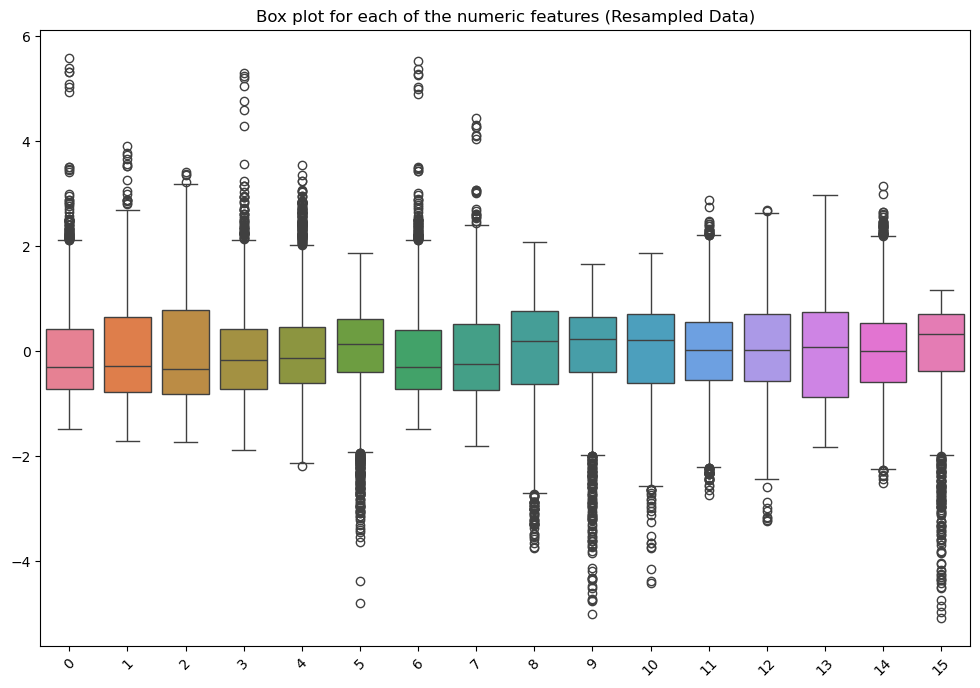


Evaluating model...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Accuracy: 0.9092558983666061
F1 Score:  0.9092
Per Class
Class: 0, F1 = 0.9393939393939394
Class: 1, F1 = 1.0
Class: 2, F1 = 0.9387755102040817
Class: 3, F1 = 0.8677685950413223
Class: 4, F1 = 0.8865979381443299
Class: 5, F1 = 0.925
Class: 6, F1 = 0.9146005509641874
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       1.00      1.00      1.00         5
           2       0.92      0.96      0.94        48
           3       0.85      0.88      0.87       119
           4       0.90      0.88      0.89        49
           5       0.91      0.94      0.93        79
           6       0.93      0.90      0.91       185

    accuracy                           0.91       551
   macro avg       0.92      0.93      0.92       551
weighted avg       0.91      0.91      0.91       551



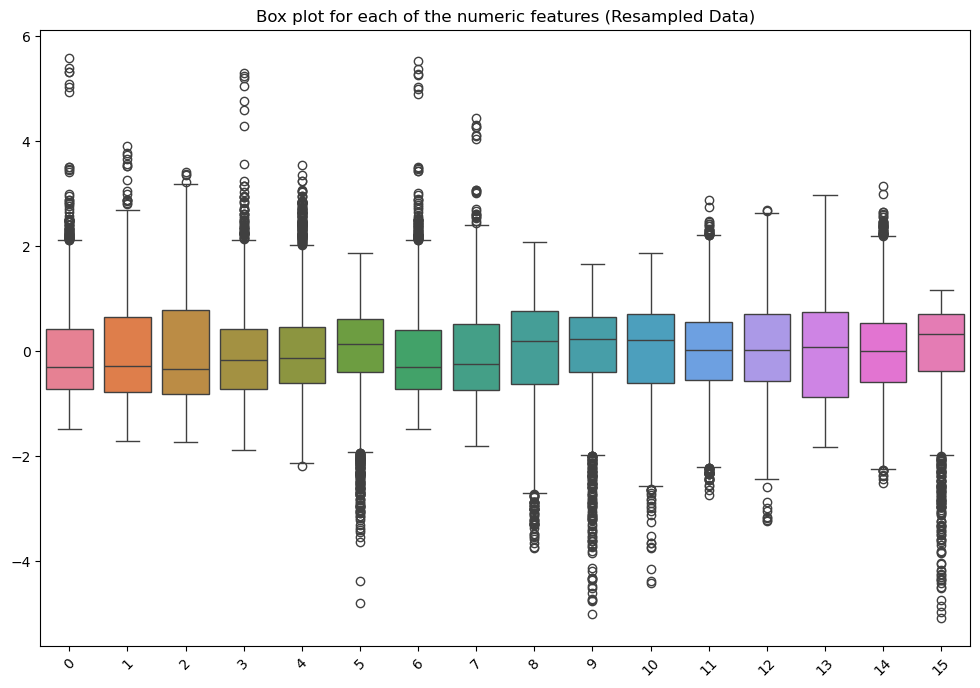

In [23]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

**ANSWER CELL**

Bagging was applied to each of the base models (SVM,LR and NN) to improve their generalisation and stabilise their performance. Bagging was used because the beans dataset is imbalanced, by bagging the data it creates diverse subsets of data through bootstrapping which helps reduce the chances of over fitting as it allows each models to be able to learn the variations in the data. This is especially useful for the LR and NN models as they struggle to converge with imbalanced datasets such as the beans datasets. As for SVM model it helped create a more robust decision boundary. 50 estimators was used as the parameter as it balances the computational cost and performance, if it was higher though it would increase the training time which would not be ideal. The use of random_state = 42 is to keep reproducibility between the bagged models by fixing the random seed for bagging.

By combining the bagged models into voting ensemble it is able to boost the performance further. The voting leverages the strong points of the bagged models by aggregating the predictions from the models the voting ensemble is able to create a better performance and higher stability metrics. It shows the effectiveness of using ensemble for addressing any model weaknesses and the imbalance in the beans.csv dataset. Individual models struggle with over-fitting and imbalanced datasets, a good example of this is how both LR and NN models both struggled, LR struggled to converge and NN was inconsistent across its cross-validation splits. Combining the bagged version with ensemble manages to get the best possible out of the trained models.

reference:

Kurama, V. (2020). Introduction to Bagging and Ensemble Methods. [online] Paperspace Blog. Available at: https://blog.paperspace.com/bagging-ensemble-methods/.

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

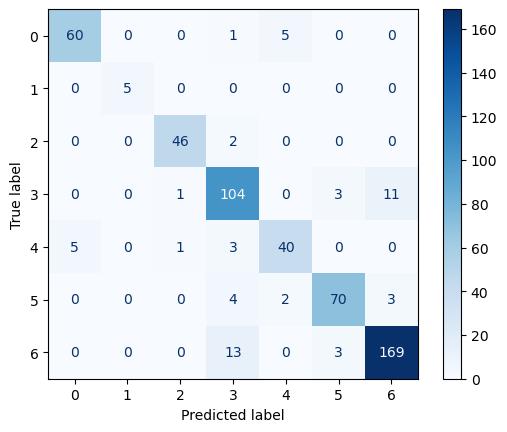

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

#SVM Model
model_1 = grid_model1.best_estimator_

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_1.classes_)
disp.plot(cmap='Blues')

**ANSWER CELL**

The best model selected for the final evaluation was the SVM model, which achieved the highest weighted F1 score of 0.9109 out performing the other models marginally in this assessment. The SVMs ability to effectively separate classes using its kernel based approach made it well suited to the dataset, even with the rather large class imbalances.

The SVMs final evaluation metrics were:
Accuracy: 91.11%

Weighted F1 Score: 0.9109

Macro Average F1 Score: 0.93

Class-Wise F1 Scores:
Class 0: 0.95
Class 1: 1.00 (indicating perfect classification, though based on limited samples)
Class 2: 0.94
Class 3: 0.87
Class 4: 0.90
Class 5: 0.93
Class 6: 0.91

The use of the confusion matrix allows us to infer that the SVM model managed to maintain a high precision and recall for most of the classes, however, Class 3 has a slightly lower result than the rest which suggest that the model struggled particularly on this class specifically. This could be due to the imbalance in the dataset or potentially an overlap in the features, which can complicate separability. Compared to the Logistic Regression and Neural Network models, the SVM model demonstrated a better performance in handling the imbalanced dataset even if it was marginally as LR struggled with convergence and NN under performed due to its sensitivity to hyperparameter tuning and the size of the dataset which in this case was large. Additionally, using a RobustScaler also helped the SVM model perform the best by ensuring that the model was able to handle the dataset as effectively as possible.

The robustness of the SVM model helped its strong performance in addressing the imbalanced and complex beans.csv dataset, making it an efficient choice for this task.

## References

[1] Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. _Computers and Electronics in Agriculture_, 174, p.105507.

[2] Murat Koklu: Dry Bean Dataset https://www.muratkoklu.com/datasets/ (accessed 14/08/2024)

[3] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[4] Pazoki, A.R., Farokhi, F. and Pazoki, Z., 2014. Classification of rice grain varieties using two artificial neural networks (MLP and neuro-fuzzy).